# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Analysis

In [2]:
# Dataset Overview

shots = pd.read_csv("/kaggle/input/world-cup-penalty-shootouts/WorldCupShootouts.csv")
shots.head()

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0


In [3]:
print('INFO')
print(shots.info())
print('DESCRIBE')
print(shots.describe())

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         304 non-null    int64  
 1   Team            304 non-null    object 
 2   Zone            279 non-null    float64
 3   Foot            279 non-null    object 
 4   Keeper          279 non-null    object 
 5   OnTarget        279 non-null    float64
 6   Goal            279 non-null    float64
 7   Penalty_Number  304 non-null    int64  
 8   Elimination     280 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 21.5+ KB
None
DESCRIBE
          Game_id        Zone    OnTarget        Goal  Penalty_Number  \
count  304.000000  279.000000  279.000000  279.000000      304.000000   
mean    15.368421    5.594982    0.917563    0.698925        5.578947   
std      8.703161    2.559531    0.275524    0.459550        2.939492   
min      1.000000    1.0000

In [4]:
print(shots.shape)
shots.isna().sum()

(304, 9)


Game_id            0
Team               0
Zone              25
Foot              25
Keeper            25
OnTarget          25
Goal              25
Penalty_Number     0
Elimination       24
dtype: int64

In [5]:
# Drop NaN values
shots = shots.dropna()
print(shots.shape)
shots.head()

(279, 9)


,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0


## Visualization: Number of Shots Taken 

In [6]:
# Count the number of shots taken for each zone
zones = list(shots['Zone'].astype(int))
zone_counts = [zones.count(i) for i in range(1, 10)]
zone_counts

[28, 19, 16, 36, 18, 33, 63, 20, 46]

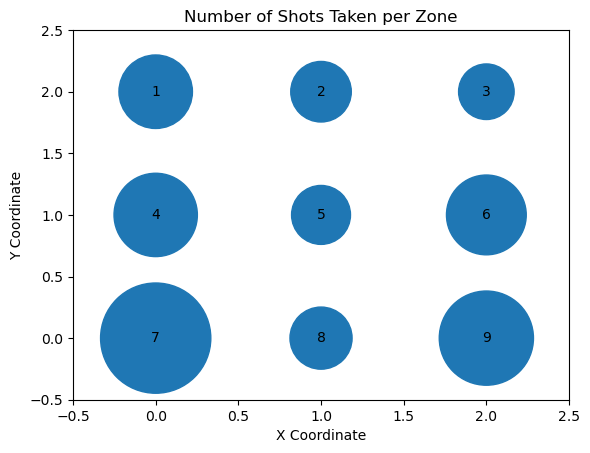

In [7]:
# Adjust the counts so the size difference in the scatterplot is more visible
scale = 100
adjusted_counts = [i*scale for i in zone_counts]

# Assign coordinates for each number to their corresponding spot on goal
x_coords = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_coords = [2, 2, 2, 1, 1, 1, 0, 0, 0]

# Scatter Plot
plt.scatter(x_coords, y_coords, s=adjusted_counts)

# Add labels to the plot
map_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
for i, label in enumerate(map_labels):
    plt.text(x_coords[i], y_coords[i], label, ha='center', va='center')

# Label Plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Number of Shots Taken per Zone')

# Set the axis limits to include the entire circles
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

plt.show()

Most shots are pocketed in the bottom corner. Players show a preference for lower shots over higher shots, and for wider shots over shots towards the center of the goal.

## Visualization: Shot Conversions

In [8]:
#Take the accuracy of shots taken for each zone
goals = shots[shots['Goal'].astype(int)==1]
goal_zones = list(goals['Zone'].astype(int))
goal_counts = [goal_zones.count(i) for i in range(1, 10)]

rates = [i/j for i, j in zip(goal_counts, zone_counts)]
rates

[0.75,
 0.5789473684210527,
 0.875,
 0.75,
 0.6111111111111112,
 0.7575757575757576,
 0.6349206349206349,
 0.6,
 0.7391304347826086]

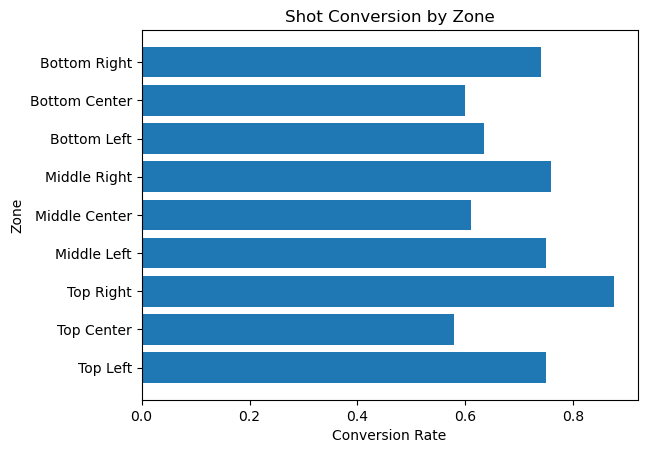

In [9]:
# Label each zone
labels = ['Top Left', 'Top Center', 'Top Right', 'Middle Left', 'Middle Center', 'Middle Right', 'Bottom Left', 'Bottom Center', 'Bottom Right']

# Bar Plot
plt.barh(labels, rates)

# Labels
plt.xlabel('Conversion Rate')
plt.ylabel('Zone')
plt.title('Shot Conversion by Zone')

plt.show()

Shots made towards the right side of the goal have the highest conversion rate, with shots on the left coming in second and shots down the middle having the lowest rate of goals. Shots at the top right of the goal have an especially high success rate.

## Visualization: Off-Target Shots

In [11]:
# Get the counts for misses on each zone
misses = shots[shots['OnTarget'].astype(int)==0]
misses_list = list(misses['Zone'].astype(int))
miss_counts = [misses_list.count(i) for i in range(1, 10)]

miss_counts

[6, 7, 2, 1, 0, 1, 5, 0, 1]

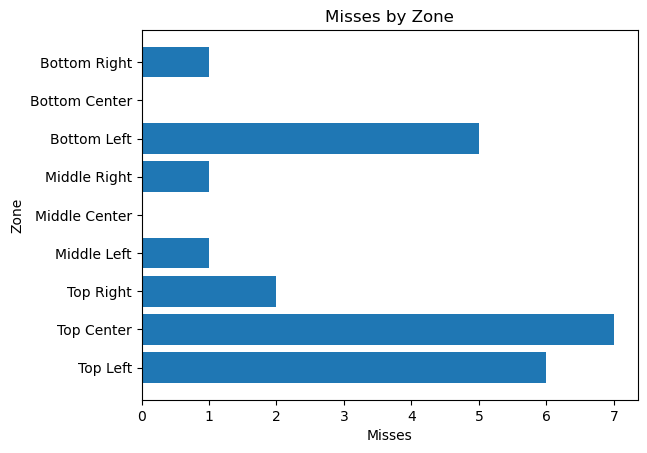

In [12]:
# Bar Plot
plt.barh(labels, miss_counts)

# Labels
plt.xlabel('Misses')
plt.ylabel('Zone')
plt.title('Off-Target Shots by Zone')

plt.show()

Most off-target shots occur when players aim for areas at the top of the goal. This might occur because when players try to get lift on the ball, it can be easy to overshoot it.

## Visualization: Keeper Dives

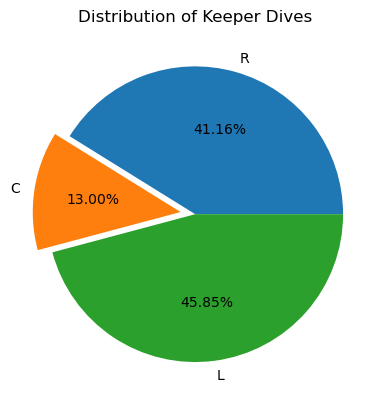

In [40]:
# Labels corresponding the right, center, and left
keeper_labels = ['R', 'C', 'L']

# Frequency of dives for each direction
dive_list = list(shots['Keeper'])
dive_counts = [dive_list.count(i) for i in keeper_labels]

# Bar Plot
explode = [0, 0.1, 0]
plt.pie(dive_counts, labels=keeper_labels, explode=explode, autopct='%1.2f%%')

# Labels
plt.title('Distribution of Keeper Dives')

plt.show()

In [41]:
center_percentage = dive_counts[1] / sum(dive_counts)
center_percentage

0.1299638989169675

Keepers almost always choose to dive towards the left or right. They rarely stay in the center.

## Keeper Accuracy

In [44]:
# Add a feature to categorize R, L, and C shots from the zones

def zone_direction(zone):
    if zone in [1, 4, 7]:
        return 'L'
    elif zone in [2, 5, 8]:
        return 'C'
    elif zone in [3, 6, 9]:
        return 'R'
    else:
        return np.nan
    
shots['Shooter'] = shots['Zone'].apply(zone_direction)
shots

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination,Shooter
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0,L
1,1,GER,9.0,R,C,1.0,1.0,2,0.0,R
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0,R
3,1,GER,2.0,R,C,1.0,1.0,4,0.0,C
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0,R
...,...,...,...,...,...,...,...,...,...,...
299,30,CRO,7.0,R,L,1.0,1.0,6,0.0,L
300,30,RUS,7.0,R,R,1.0,1.0,7,0.0,L
301,30,CRO,4.0,R,R,1.0,1.0,8,0.0,L
302,30,RUS,7.0,R,R,1.0,1.0,9,1.0,L


In [45]:
# Add a feature to categorize a keeper's dive as a miss (0) or a hit (1)

def dive_match(keeper, shooter):
    if keeper==shooter:
        return True
    else:
        return False
    
shots['Guessed'] = shots.apply(lambda row: dive_match(row['Keeper'], row['Shooter']), axis=1)
shots

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination,Shooter,Guessed
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0,L,False
1,1,GER,9.0,R,C,1.0,1.0,2,0.0,R,False
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0,R,False
3,1,GER,2.0,R,C,1.0,1.0,4,0.0,C,True
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0,R,False
...,...,...,...,...,...,...,...,...,...,...,...
299,30,CRO,7.0,R,L,1.0,1.0,6,0.0,L,True
300,30,RUS,7.0,R,R,1.0,1.0,7,0.0,L,False
301,30,CRO,4.0,R,R,1.0,1.0,8,0.0,L,False
302,30,RUS,7.0,R,R,1.0,1.0,9,1.0,L,False


In [51]:
keeper_accuracy = sum(shots['Guessed']) / shots.shape[0]
keeper_accuracy

0.45161290322580644

Keepers dived the correct directions around 45% of the time

In [53]:
# Separate shots by guessed
guessed = shots[shots['Guessed']==True]
missed = shots[shots['Guessed']==False]

# Find the probability of saving a guessed vs a missed shot
guessed_p = sum(guessed['Goal'].astype(int)==0) / guessed.shape[0]
missed_p = sum(missed['Goal'].astype(int)==0) / missed.shape[0]

guessed_p, missed_p

(0.4523809523809524, 0.17647058823529413)

Keepers have a 45% chance of saving a shot where they dived the correct direction. if they do not guess correctly, they only have an 18% chance where the player does not score. Keepers are strongly rewarded for diving the correct direction. If we want to analyze how beneficial it is for keepers to guess a direction, we should also analyze shots where the keeper uses their reactions only to make a save.

## Conclusions

From the data analysis above, the best penalty should go into one of the bottom corners. Most players seem to follow this strategy, although there are still shots in other areas. Another strategy a player may take is to look for an early dive from the keeper, which is why we may see shots in other areas. Other penalty methods like the panenka (chip down the middle) are also occassionally used.

Looking at this dataset alone, we might conclude that we should always shoot towards the bottom right, but this is not a viable strategy. A further step to take from this analysis is to look at specific kickers, and we could use that to derive certain strategies from players. Given this, a predictable strategy such as always shooting bottom right would easily be seen through by the keeper, even without any data analysis tools. One possible reason the shots on the right have a higher conversion rate is that most keepers are right-handed and prefer dives towards their right (our left). This is reflected in our analysis of keeper dives. As a penalty kick taker, it might be a good idea to look at the data for the opposing keeper before the game. 

Keepers almost always dive towards the left and right, and only stay in the center of the goal around 13% of the time. For the most part, keepers at this level will guess a direction to dive in because the kick is taken so close to the goal. This is why we see so many occurences where the keeper dives the opposite direction of where the kick is shot, and keepers only dive the correct direction around 45% of the time. However, even despite this statistic, players are still not highly likely to score if they shoot down the middle. Perhaps keepers are able to recover from their dive in time for a shot coming down the middle.

One problem with this data is that there are only 274 records, which means it is possible some of the patterns we have noticed here are simply due to chance. Analysis of penalties across other competitions could yield different results, but some of the more obvious patters like frequency of shots in the bottom corner should still hold true in these analyses.

If players can get a shot in on the top corner, the keeper has a very low probability of saving it. However, the real danger comes from missing the target. The bottom corner has less misses because players do not have to worry about vertical accuracy when placing a shot on the ground, but adding lift to their shot can easily lead to them hitting the ball over the bar. Even talented players like Harry Kane can miss shots this way.

In [26]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/J_4NMn9JjwM?start=21" 
title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; 
web-share" allowfullscreen></iframe>

Many top-level players find success in calmly watching for the keeper to make a dive, then placing the penalty in the opposite corner. Balotelli is a great example of this technique. Other notable penalty takers that use this method include Jorginho and Neymar.

In [27]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/ThRWTFLWNYA" title="YouTube video player" 
frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; 
picture-in-picture; web-share" allowfullscreen></iframe>